<a href="https://colab.research.google.com/github/yibowang15/Capstone/blob/VGG16-Initialization/Method1_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Import Necessary Libs**

In [ ]:
import pandas as pd
import os
import shutil
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import load_model, Model
from keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
from matplotlib.image import imread

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


**Load Testing, Training, Validation Data from Drive to /content**

In [ ]:
# Copy Testing Data to /content
!cp -r /content/drive/MyDrive/CapstoneProject/data/TestingData /content/

# Copy Training Data to /content
!cp -r /content/drive/MyDrive/CapstoneProject/data/TrainingData /content/

# Copy Validation Data to /content
!cp -r /content/drive/MyDrive/CapstoneProject/data/ValidationData /content/

**Divide the Training Dataset into Subfolders**
- Provide the Model with labeled dataset for supervised learning

In [ ]:
# Load training and validation data from CSV files (or prepare the data)
df_training = pd.read_csv('/content/drive/MyDrive/CapstoneProject/data/df_training.csv')

# Convert labels from 0/1 to 'cat'/'dog' for binary classification（integer format to string format)
df_training['category'] = df_training['category'].replace({0: 'cat', 1: 'dog'})

# Define source and target directories
source_dir = '/content/TrainingData'  # Original TrainingData directory
cat_dir = os.path.join(source_dir, 'cat')  # Subdirectory for cat images
dog_dir = os.path.join(source_dir, 'dog')  # Subdirectory for dog images

# Create target directories (if they don't exist)
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Iterate through each row in the CSV file and move images to the corresponding subdirectory based on the category
for index, row in df_training.iterrows():
    filename = row['filename']
    category = row['category']  # Category should be 'cat' or 'dog'

    # Determine the target directory based on the category
    if category == 'cat':
        target_dir = cat_dir
    elif category == 'dog':
        target_dir = dog_dir
    else:
        continue  # Skip if the category is not 'cat' or 'dog'

    # Define the source file path and target file path
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_dir, filename)

    # Check if the file exists in the source directory
    if os.path.exists(source_path):
        # Move the file to the target directory
        shutil.move(source_path, target_path)
        print(f"Moved {filename} to {target_dir}")
    else:
        print(f"File {filename} not found in {source_dir}")

print("File moving completed.")

Streaming output truncated to the last 5000 lines.
Moved cat.10594.jpg to /content/TrainingData/cat
Moved cat.4788.jpg to /content/TrainingData/cat
Moved cat.7359.jpg to /content/TrainingData/cat
Moved dog.3842.jpg to /content/TrainingData/dog
Moved cat.9120.jpg to /content/TrainingData/cat
Moved cat.10143.jpg to /content/TrainingData/cat
Moved cat.9261.jpg to /content/TrainingData/cat
Moved cat.2330.jpg to /content/TrainingData/cat
Moved dog.776.jpg to /content/TrainingData/dog
Moved cat.5938.jpg to /content/TrainingData/cat
Moved dog.10798.jpg to /content/TrainingData/dog
Moved dog.5170.jpg to /content/TrainingData/dog
Moved cat.11599.jpg to /content/TrainingData/cat
Moved cat.7136.jpg to /content/TrainingData/cat
Moved dog.8266.jpg to /content/TrainingData/dog
Moved dog.1027.jpg to /content/TrainingData/dog
Moved dog.11792.jpg to /content/TrainingData/dog
Moved cat.5560.jpg to /content/TrainingData/cat
Moved cat.10090.jpg to /content/TrainingData/cat
Moved cat.9710.jpg to /content/T

**Divide the Validation Dataset into Subfolders**

In [ ]:
# Read the CSV file
df_validation = pd.read_csv('/content/drive/MyDrive/CapstoneProject/data/df_validation.csv')

# Convert labels from 0/1 to 'cat'/'dog' for binary classification
df_validation['category'] = df_validation['category'].replace({0: 'cat', 1: 'dog'})

# Define source and target directories
source_dir = '/content/ValidationData'  # Original ValidationData directory
cat_dir = os.path.join(source_dir, 'cat')  # Subdirectory for cat images
dog_dir = os.path.join(source_dir, 'dog')  # Subdirectory for dog images

# Create target directories (if they don't exist)
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Iterate through each row in the CSV file and move images to the corresponding subdirectory based on the category
for index, row in df_validation.iterrows():
    filename = row['filename']
    category = row['category']  # Category should be 'cat' or 'dog'

    # Determine the target directory based on the category
    if category == 'cat':
        target_dir = cat_dir
    elif category == 'dog':
        target_dir = dog_dir
    else:
        continue  # Skip if the category is not 'cat' or 'dog'

    # Define the source file path and target file path
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_dir, filename)

    # Check if the file exists in the source directory
    if os.path.exists(source_path):
        # Move the file to the target directory
        shutil.move(source_path, target_path)
        print(f"Moved {filename} to {target_dir}")
    else:
        print(f"File {filename} not found in {source_dir}")

print("Validation data has been moved into 'cat' and 'dog' folders.")

Moved dog.888.jpg to /content/ValidationData/dog
Moved cat.3243.jpg to /content/ValidationData/cat
Moved cat.11707.jpg to /content/ValidationData/cat
Moved cat.10557.jpg to /content/ValidationData/cat
Moved cat.8942.jpg to /content/ValidationData/cat
Moved dog.12094.jpg to /content/ValidationData/dog
Moved cat.8199.jpg to /content/ValidationData/cat
Moved dog.9127.jpg to /content/ValidationData/dog
Moved dog.6791.jpg to /content/ValidationData/dog
Moved cat.5338.jpg to /content/ValidationData/cat
Moved cat.12344.jpg to /content/ValidationData/cat
Moved dog.3568.jpg to /content/ValidationData/dog
Moved dog.3701.jpg to /content/ValidationData/dog
Moved cat.10201.jpg to /content/ValidationData/cat
Moved cat.3211.jpg to /content/ValidationData/cat
Moved cat.482.jpg to /content/ValidationData/cat
Moved cat.11207.jpg to /content/ValidationData/cat
Moved dog.4762.jpg to /content/ValidationData/dog
Moved cat.1700.jpg to /content/ValidationData/cat
Moved dog.11417.jpg to /content/ValidationData

**Divide the Testing Dataset into Subfolders**

In [ ]:
# Load testing dataframe from .csv
df_testing = pd.read_csv('/content/drive/MyDrive/CapstoneProject/data/df_testing.csv')

# Covert 0 to 'cat', 1 to 'dog'(string format)
df_testing['category'] = df_testing['category'].replace({0: 'cat', 1: 'dog'})

# Define source dir and destination dir
source_dir = '/content/TestingData'  # source dir
cat_dir = os.path.join(source_dir, 'cat')  # cat subfolder
dog_dir = os.path.join(source_dir, 'dog')  # dog subfolder

# Create dst dir
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Iterate the source dir and move the target to dst dir
for index, row in df_testing.iterrows():
    filename = row['filename']
    category = row['category']

    # Move to corresponding dir according to category
    if category == 'cat':
        target_dir = cat_dir
    elif category == 'dog':
        target_dir = dog_dir
    else:
        continue  # skip if category != cat or dog

    # Define paths
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_dir, filename)

    # Check if the source exists
    if os.path.exists(source_path):
        # Move
        shutil.move(source_path, target_path)
        print(f"Moved {filename} to {target_dir}")
    else:
        print(f"File {filename} not found in {source_dir}")

print("Testing data has been moved into 'cat' and 'dog' folders.")



Moved cat.604.jpg to /content/TestingData/cat
Moved cat.7042.jpg to /content/TestingData/cat
Moved cat.7942.jpg to /content/TestingData/cat
Moved cat.11232.jpg to /content/TestingData/cat
Moved cat.2020.jpg to /content/TestingData/cat
Moved dog.3256.jpg to /content/TestingData/dog
Moved cat.11431.jpg to /content/TestingData/cat
Moved dog.9171.jpg to /content/TestingData/dog
Moved dog.2428.jpg to /content/TestingData/dog
Moved cat.6951.jpg to /content/TestingData/cat
Moved dog.5585.jpg to /content/TestingData/dog
Moved dog.9187.jpg to /content/TestingData/dog
Moved dog.4908.jpg to /content/TestingData/dog
Moved cat.3856.jpg to /content/TestingData/cat
Moved cat.949.jpg to /content/TestingData/cat
Moved dog.4469.jpg to /content/TestingData/dog
Moved cat.2166.jpg to /content/TestingData/cat
Moved cat.576.jpg to /content/TestingData/cat
Moved cat.7199.jpg to /content/TestingData/cat
Moved dog.9065.jpg to /content/TestingData/dog
Moved dog.9299.jpg to /content/TestingData/dog
Moved dog.242.

**Plot the First 9 Images of Dog and Cat**

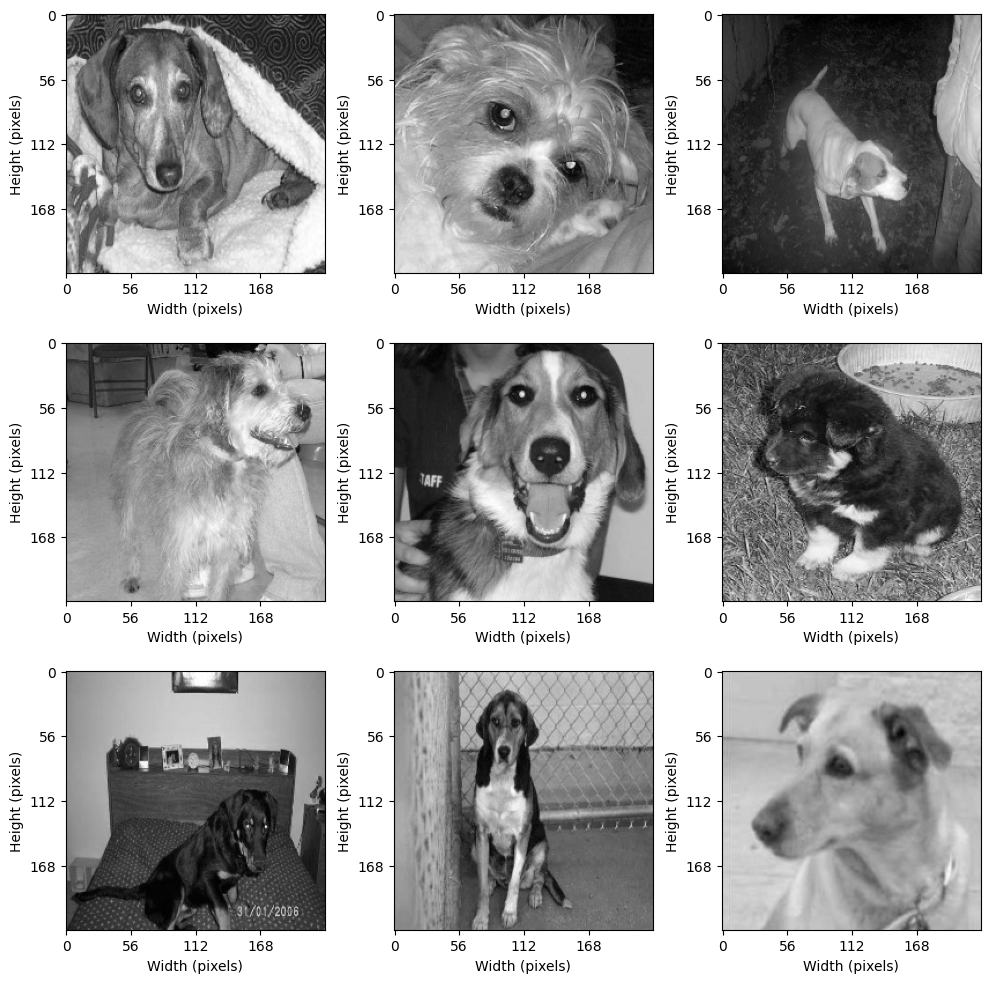

In [ ]:
# Define the location of the dataset
folder = '/content/TestingData/'  # Change this to the path of your test data folder

# Create a figure to hold 9 images
plt.figure(figsize=(10, 10))

# Define the categories (subfolder names)
categories = ['dog']

# Initialize an image counter
img_count = 0

# Iterate through each category folder
for category in categories:
    # Get the first 9 images from the category folder
    category_folder = os.path.join(folder, category)
    images = os.listdir(category_folder)[:9]  # Take the first 9 image files

    for image_name in images:
        # Only continue loading images if the counter is less than 9
        if img_count >= 9:
            break
        # Define the image path
        image_path = os.path.join(category_folder, image_name)
        # Load image pixel data
        image = imread(image_path)
        # Set the subplot location
        plt.subplot(330 + 1 + img_count)
        # Display the image (in grayscale)
        plt.imshow(image, cmap='gray')
        # Display pixel dimensions on the axes
        plt.gca().set_xticks(range(0, image.shape[1], image.shape[1] // 4))
        plt.gca().set_yticks(range(0, image.shape[0], image.shape[0] // 4))
        # Set axis labels to show pixel count
        plt.gca().set_xlabel('Width (pixels)')
        plt.gca().set_ylabel('Height (pixels)')
        # Update the counter
        img_count += 1

# Show the figure
plt.tight_layout()
plt.show()

**Plot the First 9 Cat Images**

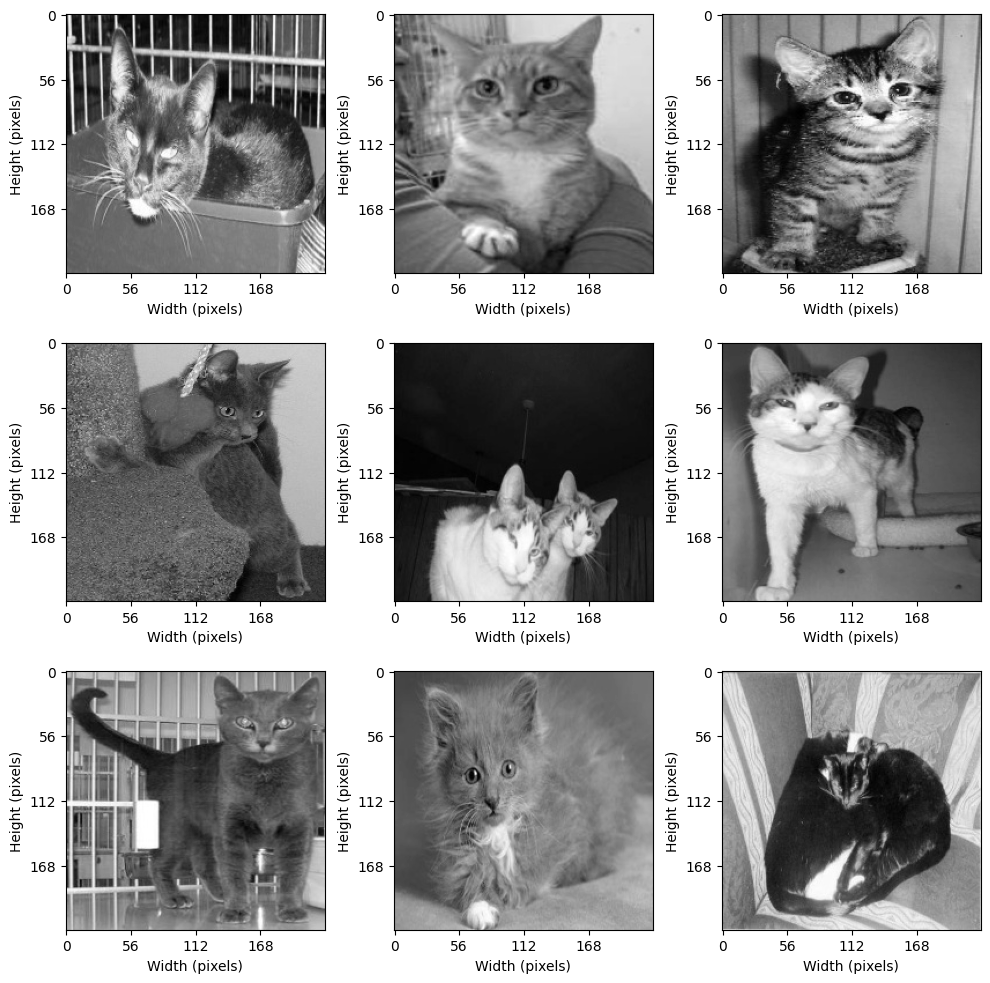

In [ ]:
# Define the location of the dataset
folder = '/content/TestingData/'  # Change this to the path of your test data folder

# Create a figure to hold 9 images
plt.figure(figsize=(10, 10))

# Define the categories (subfolder names)
categories = ['cat']

# Initialize an image counter
img_count = 0

# Iterate through each category folder
for category in categories:
    # Get the first 9 images from the category folder
    category_folder = os.path.join(folder, category)
    images = os.listdir(category_folder)[:9]  # Take the first 9 image files

    for image_name in images:
        # Only continue loading images if the counter is less than 9
        if img_count >= 9:
            break
        # Define the image path
        image_path = os.path.join(category_folder, image_name)
        # Load image pixel data
        image = imread(image_path)
        # Set the subplot location
        plt.subplot(330 + 1 + img_count)
        # Display the image (in grayscale)
        plt.imshow(image, cmap='gray')
        # Display pixel dimensions on the axes
        plt.gca().set_xticks(range(0, image.shape[1], image.shape[1] // 4))
        plt.gca().set_yticks(range(0, image.shape[0], image.shape[0] // 4))
        # Set axis labels to show pixel count
        plt.gca().set_xlabel('Width (pixels)')
        plt.gca().set_ylabel('Height (pixels)')
        # Update the counter
        img_count += 1

# Show the figure
plt.tight_layout()
plt.show()

**Image Data Generator for Training and Validation**
- Batch size 256

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Training data generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory='/content/TrainingData',
    target_size=(224, 224),
    batch_size=256,
    class_mode='binary',
    color_mode='grayscale'
)

# Validation data generator using flow_from_directory
validation_generator = validation_datagen.flow_from_directory(
    directory='/content/ValidationData',
    target_size=(224, 224),
    batch_size=256,
    class_mode='binary',
    color_mode='grayscale'
)


Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Re-construct VGG16 Model**
- Initialization first ConvNet using the green channel's weight
- Save the compiled model as final_m1_s2_model.keras

In [ ]:
import os
import tensorflow.keras.applications
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Get weights of block1_conv1 (shape: [3, 3, 3, 64])
block1_conv1 = model.get_layer('block1_conv1').get_weights()
weights, biases = block1_conv1

# Extract the green channel weights
# weights shape = [3, 3, 3, 64], where axis 2 is the channel axis (0=R, 1=G, 2=B)
green_channel_weights = weights[:, :, 1:2, :]  # Extracting only the green channel, shape becomes [3, 3, 1, 64]

# Set up the new weights for block1_conv1
new_block1_conv1 = [green_channel_weights, biases]

# Reconstruct the layers of VGG16 but replace block1_conv1 weights with green channel weights

# Get weights of all the layers starting from 'block1_conv2'
vgg16_weights = {}
for layer in model.layers[2:]:
    if "conv" in layer.name:
        vgg16_weights["1024_" + layer.name] = model.get_layer(layer.name).get_weights()

del model

# Custom build VGG16
input = Input(shape=(224, 224, 1), name='224_input')
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1), data_format="channels_last", name='1024_block1_conv1')(input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='1024_block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='1024_block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='1024_block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='1024_block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='1024_block5_pool')(x)

# Create the base model
base_model = Model(inputs=input, outputs=x)

# Set the new weights for block1_conv1
base_model.get_layer('1024_block1_conv1').set_weights(new_block1_conv1)

# Set weights for other layers
for layer in base_model.layers[2:]:
    if 'conv' in layer.name:
        base_model.get_layer(layer.name).set_weights(vgg16_weights[layer.name])

# # DIFFERENCE BETWEEN SCENARIO 1 AND SCENARIO 2
# #  Freeze all ConvNetlayers
# for layer in base_model.layers:
#   	  layer.trainable = False
# # Unfreeze the layers we want
# for layer in base_model.layers[-6:]: # Only unfreeze the classifier layers in 1
#       layer.trainable = True

# Add the classifier part
x = Flatten(name='Flatten')(base_model.output)
x = Dense(4096, activation='relu', name='FC1')(x)
x = Dropout(0.5, name='Dropout1')(x)
x = Dense(4096, activation='relu', name='FC2')(x)
x = Dropout(0.5, name='Dropout2')(x)
x = Dense(1, activation='sigmoid', name='Output_Layer_Classification')(x)

# Create the final model
final_model = Model(inputs=base_model.input, outputs=x)
final_model.summary()

# Save the model
final_model.save('final_m1_s1_model.keras')

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 224_input (InputLayer)               │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block1_conv1 (Conv2D)           │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block1_conv2 (Conv2D)           │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block2_conv1 (Conv2D)           │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block2_conv2 (Conv2D)           │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block3_conv1 (Conv2D)           │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block3_conv2 (Conv2D)           │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block3_conv3 (Conv2D)           │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block4_conv1 (Conv2D)           │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block4_conv2 (Conv2D)           │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block4_conv3 (Conv2D)           │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block5_conv1 (Conv2D)           │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block5_conv2 (Conv2D)           │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block5_conv3 (Conv2D)           │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1024_block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,263,489 (512.17 MB)

 Trainable params: 134,263,489 (512.17 MB)

 Non-trainable params: 0 (0.00 B)

**Compile Model:**
- Set optimizer
- Set loss function

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD

# Load saved complied model
final_model = load_model('final_m1_s1_model.keras')

# Set optimizer
opt = SGD(learning_rate=0.001, momentum=0.9)

# Compile model with loss function, optimizer, and metrics
final_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

**Start Training:**
- Set reduce learning rate scheme
- Set Earling Stopping
- Set Checkpoint (as "best_m1_s2_model.keras)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set Reduce learning rate Scheme
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    factor=0.1,  # reduce lr with a factor of 0.1
    patience=4,  # reduce lr when the accuracy is not improving within 4 epochs
    min_lr=1e-6,  # min lr
    verbose=1  # print info
)

# Set Checkpoint callback to save the best model based on validation accuracy
checkpoint_path = '/content/best_m1_s1_model.keras'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Set Early Stopping Scheme
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


**Start Training and Plot the Figure**

Epoch 1/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5040 - loss: nan
Epoch 1: val_accuracy improved from -inf to 0.48741, saving model to /content/best_m1_s2_model.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 44s 494ms/step - accuracy: 0.5040 - loss: nan - val_accuracy: 0.4874 - val_loss: nan - learning_rate: 0.0100
Epoch 2/25
 1/78 ━━━━━━━━━━━━━━━━━━━━ 30s 399ms/step - accuracy: 0.4570 - loss: nan
Epoch 2: val_accuracy did not improve from 0.48741
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4570 - loss: nan - val_accuracy: 0.4643 - val_loss: nan - learning_rate: 0.0100
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5051 - loss: nan
Epoch 3: val_accuracy did not improve from 0.48741
78/78 ━━━━━━━━━━━━━━━━━━━━ 32s 385ms/step - accuracy: 0.5051 - loss: nan - val_accuracy: 0.4861 - val_loss: nan - learning_rate: 0.0100
Epoch 4/25
 1/78 ━━━━━━━━━━━━━━━━━━━━ 27s 360ms/step - accuracy: 0.5664 - loss: nan
Epoch 4: val_accuracy did not improve from 0.48741
78/78 ━

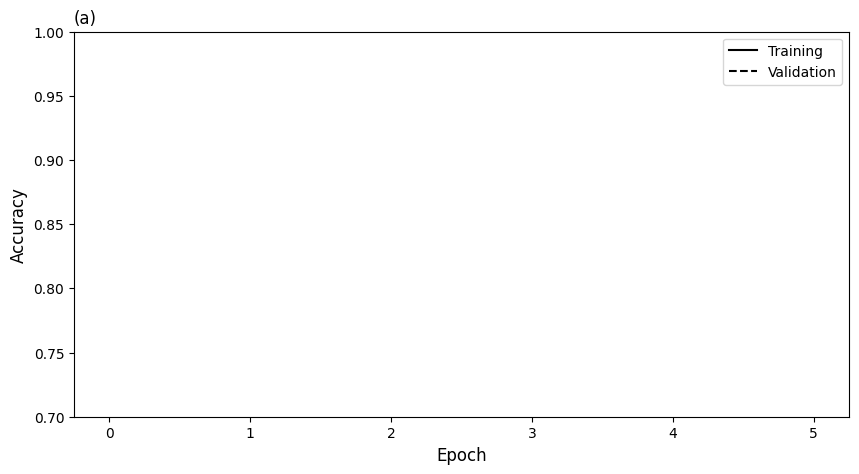

78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - accuracy: 0.4959 - loss: nan
Best Model Training Accuracy: 0.5027
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.4879 - loss: nan
Best Model Validation Accuracy: 0.4831


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit Model
try:
    history = final_model.fit(
        train_generator,  # 训练数据生成器
        steps_per_epoch=train_generator.samples // train_generator.batch_size,  # 每个 epoch 的步数
        epochs=25,  # 训练的 epoch 数量
        validation_data=validation_generator,  # 验证数据生成器
        validation_steps=validation_generator.samples // validation_generator.batch_size,  # 每个 epoch 的验证步数
        callbacks=[early_stopping, checkpoint, reduce_lr]  # 添加回调函数
    )

    # 获取每个 epoch 的学习率
    lrs = [float(final_model.optimizer.learning_rate.numpy()) for epoch in range(len(history.history['accuracy']))]

    # 获取每个 epoch 的训练准确率和验证准确率
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs_range = range(len(acc))  # x 轴范围

    # 创建图形
    plt.figure(figsize=(10, 5))

    # 绘制训练与验证准确率曲线
    plt.plot(epochs_range, acc, label='Training', color='black')  # 实线
    plt.plot(epochs_range, val_acc, label='Validation', color='black', linestyle='dashed')  # 虚线

    # 不再设置右侧 y 轴，只保留左侧 y 轴显示 accuracy
    plt.title('(a)', loc='left', fontsize=12)  # 设置标题
    plt.xlabel('Epoch', fontsize=12)  # x 轴
    plt.ylabel('Accuracy', fontsize=12)  # 左侧 y 轴为准确率

    # 设置左侧 Y 轴范围
    plt.ylim(0.7, 1.0)  # 调整范围为 0.7 到 1.0

    # 手动设置左侧 Y 轴的刻度
    plt.yticks(np.arange(0.7, 1.01, 0.05))  # 每 0.05 作为一个间隔

    # 移除图例（不显示右上角的 learning rate）
    plt.legend(['Training', 'Validation'], loc='best', fontsize=10)

    # 显示图形
    plt.show()

    # 加载保存的最优模型
    best_model = load_model('best_m1_s1_model.keras')

    # 在训练集上评估最优模型
    train_loss, train_accuracy = best_model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
    print(f"Best Model Training Accuracy: {train_accuracy:.4f}")

    # 在验证集上评估最优模型
    val_loss, val_accuracy = best_model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
    print(f"Best Model Validation Accuracy: {val_accuracy:.4f}")

except Exception as e:
    print(f"Error during training: {e}")

**Start Testing**

In [ ]:
# 创建测试数据生成器
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# 设置测试数据的生成器
test_generator = test_datagen.flow_from_directory(
    directory='/content/TestingData',  # 测试数据的目录，包含 'cat' 和 'dog' 子文件夹
    target_size=(224, 224),  # VGG16 的输入尺寸
    batch_size=32,
    class_mode='binary',  # 二分类
    color_mode='grayscale',  # 灰度图像
    shuffle=False  # 不进行打乱，以确保预测和标签对齐
)

Found 2500 images belonging to 2 classes.


In [ ]:
# 加载训练过程中保存的最佳模型
best_model = load_model('best_m1_s1_model.keras')

# 使用测试数据生成器来评估最佳模型
test_loss, test_accuracy = best_model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 获取预测结果
predictions = best_model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)  # 将概率转为0或1的类别

# 获取真实标签
true_labels = test_generator.classes

# 计算测试集的准确率
calculated_accuracy = (predicted_classes.flatten() == true_labels).mean()

print(f"Calculated Test Accuracy: {calculated_accuracy:.4f}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9765 - loss: 0.0828
Test Accuracy: 0.9575
Test Loss: 0.1199
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step
Calculated Test Accuracy: 0.9576


**Move Best Performance Model to Drive**

In [ ]:
import shutil

# 定义本地文件路径
source_path = '/content/best_m1_s1_model.keras'

# 定义目标路径和重命名后的文件名
destination_path = '/content/drive/MyDrive/CapstoneProject/models/best_m1_s1_model.keras'

# 移动并重命名文件
shutil.move(source_path, destination_path)

print("文件已成功重命名并移动到指定位置！")

文件已成功重命名并移动到指定位置！
